## Data manupulation and plotting libraries 

In [55]:
import os
os.chdir(r'C:/Users/DELL')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Import data preprocessing and ML algos from skit-learn

In [3]:
from sklearn.model_selection import train_test_split

## Read dataset

In [4]:
# Browsing data
browse_data = pd.read_csv('Problem2_Site_BrowingBehavior.txt', sep='\t', header=None)
browse_data.columns=['timestamp','user_id','website_section']
browse_data.head(10)

,timestamp,user_id,website_section
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content
5,2017-07-26 00:45:48.487,0,home
6,2017-07-26 00:46:25.033,0,product-listing-category
7,2017-07-26 00:47:06.513,0,product-listing-category
8,2017-07-26 00:47:26.001,0,content
9,2017-07-26 00:48:00.868,0,home


In [5]:
# Conversion data
purchase_data = pd.read_csv('Problem2_FInalConversions.txt', sep='\t', header=None)
purchase_data.columns=['timestamp','user_id','product_purchased','cart_amt']
purchase_data.head(10)

,timestamp,user_id,product_purchased,cart_amt
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74
5,2017-07-26 00:00:19.625,0,H211801,34.35
6,2017-07-26 00:00:24.06,0,H211394,44.68
7,2017-07-26 00:00:24.846,0,E231160,980.45
8,2017-07-26 00:00:32.842,0,H213707,30.22
9,2017-07-26 00:01:09.015,0,A273516,41.40


In [6]:
# checking nulls in datasets
print(browse_data.isnull().sum())
print(purchase_data.isnull().sum())

timestamp          0
user_id            0
website_section    0
dtype: int64
timestamp            0
user_id              0
product_purchased    0
cart_amt             0
dtype: int64


In [7]:
print(f'shape of browing data: {browse_data.shape}\nshape of purchased data: {purchase_data.shape}')

shape of browing data: (5535924, 3)
shape of purchased data: (79795, 4)


In [8]:
# Change timestamp columns of both dataframes from string to datetime 
browse_data['timestamp']=pd.to_datetime(browse_data.timestamp)
purchase_data['timestamp']=pd.to_datetime(purchase_data.timestamp)
print(browse_data.dtypes,purchase_data.dtypes)

timestamp          datetime64[ns]
user_id                     int64
website_section            object
dtype: object timestamp            datetime64[ns]
user_id                       int64
product_purchased            object
cart_amt                    float64
dtype: object


In [9]:
browse_data['website_section']= browse_data['website_section'].astype(str)
purchase_data['product_purchased']= purchase_data['product_purchased'].astype(str)

In [10]:
browse_data.user_id.value_counts().head(10)

0                      1407879
3077341700699443780       3106
7190685980615725949        821
1215902060999829238        723
7188604889406730572        550
8196139059029454168        499
129240170177055445         478
3889173876144664967        429
5649288755781517931        415
3790189841148631638        412
Name: user_id, dtype: int64

In [11]:
#browse_data[browse_data['user_id']==367602028412908759].sort(['timestamp'])

In [12]:
purchase_data.product_purchased.value_counts().head(10)

K45766     6194
H211394    5168
H211370    4920
A293532    4798
H211397    1434
A302728    1341
A299297    1334
H205246    1193
H211939    1134
K41372      924
Name: product_purchased, dtype: int64

### Data quality check (Basic)

In [13]:
print(browse_data.user_id.nunique())
print(purchase_data.user_id.nunique())

516932
41009


### Conversion rate

In [14]:
print(f'Convesrion Rate = {(purchase_data.user_id.nunique()/browse_data.user_id.nunique())*100}%')

Convesrion Rate = 7.933151749166234%


### Aggregate both datasets at user level and create features

In [15]:
usr_browse_data_dur = browse_data.groupby('user_id').agg({'timestamp':lambda x:(max(x)-min(x)).total_seconds()/60})
usr_browse_data_dur.reset_index(inplace=True)

In [16]:
usr_browse_data_dur.columns.values[1]="browsing_dur"
usr_browse_data_dur.head()

,user_id,browsing_dur
0,0,1439.999900
1,2,32.193667
2,5,0.328833
3,342391,1215.484633
4,420372,0.118517


In [17]:
df_user_browse_data = browse_data.pivot_table( index=['user_id'], columns=['website_section'],aggfunc='count')
df_user_browse_data.fillna(0, inplace=True)
df_user_browse_data.head(10)
#df_user_browse_data.pivot

timestamp                                               \
website_section      cart category   content   default error      home   
user_id                                                                  
0                 84318.0      0.0  124665.0  141906.0  33.0  179270.0   
2                     0.0      0.0       6.0       1.0   0.0       1.0   
5                     0.0      0.0       0.0       0.0   0.0       0.0   
342391                0.0      0.0       0.0       0.0   0.0       4.0   
420372                0.0      0.0       0.0       0.0   0.0       0.0   
915687                0.0      0.0       0.0       0.0   0.0       1.0   
453960484             0.0      0.0       3.0       0.0   0.0       1.0   
2941287703            1.0      0.0       0.0       0.0   0.0       0.0   
3156142957            0.0      0.0       0.0       0.0   0.0       0.0   
4569793893            0.0      0.0       1.0       1.0   0.0       0.0   

                                                                              \
website_section     iroa lorigreiner  mys   product product-listing-category   
user_id                                                                        
0                86002.0         1.0  0.0  498322.0                 215841.0   
2                    0.0         0.0  0.0       6.0                      1.0   
5                    0.0         0.0  0.0       2.0                      0.0   
342391               0.0         0.0  0.0       3.0                      0.0   
420372               0.0         0.0  0.0       2.0                      0.0   
915687               0.0         0.0  0.0       1.0                      0.0   
453960484            0.0         0.0  0.0       3.0                      2.0   
2941287703           0.0         0.0  0.0       2.0                      0.0   
3156142957           0.0         0.0  0.0       2.0                      1.0   
4569793893           0.0         0.0  0.0       0.0                      1.0   

                                                                               \
website_section product-listing-custom product-listing-search productNotFound   
user_id                                                                         
0                                839.0                64991.0          1960.0   
2                                  0.0                    0.0             0.0   
5                                  0.0                    0.0             0.0   
342391                             0.0                    0.0             0.0   
420372                             0.0                    0.0             0.0   
915687                             0.0                    1.0             0.0   
453960484                          0.0                    0.0             0.0   
2941287703                         0.0                    0.0             0.0   
3156142957                         0.0                    0.0             0.0   
4569793893                         0.0                    0.0             0.0   

                                                  
website_section shoplive signupcomplete wishlist  
user_id                                           
0                 9471.0          259.0      1.0  
2                    0.0            0.0      0.0  
5                    0.0            0.0      0.0  
342391               0.0            0.0      0.0  
420372               0.0            0.0      0.0  
915687               0.0            0.0      0.0  
453960484            0.0            0.0      0.0  
2941287703           0.0            0.0      0.0  
3156142957           0.0            0.0      0.0  
4569793893           0.0            0.0      0.0

In [18]:
df_user_browse_data.columns=df_user_browse_data.columns.levels[1].tolist()
df_user_browse_data.head()
#convert index to df column
df_user_browse_data.reset_index(inplace=True)
df_user_browse_data.head()

,user_id,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist
0,0,84318.0,0.0,124665.0,141906.0,33.0,179270.0,86002.0,1.0,0.0,498322.0,215841.0,839.0,64991.0,1960.0,9471.0,259.0,1.0
1,2,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,342391,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,420372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_user_browse_data = df_user_browse_data.merge(usr_browse_data_dur,on='user_id',how='left')
df_user_browse_data.head()

,user_id,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist,browsing_dur
0,0,84318.0,0.0,124665.0,141906.0,33.0,179270.0,86002.0,1.0,0.0,498322.0,215841.0,839.0,64991.0,1960.0,9471.0,259.0,1.0,1439.999900
1,2,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.193667
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.328833
3,342391,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1215.484633
4,420372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.118517


### Adding new features to purchased data

In [20]:
# New features
#purchase_data['date'] = purchase_data['timestamp'].dt.date

purchase_data['no_of_products'] = purchase_data['product_purchased'].str.count(',')+1
purchase_data['price_per_product'] = purchase_data['cart_amt']/purchase_data['no_of_products']
purchase_data.head()

,timestamp,user_id,product_purchased,cart_amt,no_of_products,price_per_product
0,2017-07-26 00:00:10.465,0,A293532,52.14,1,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50,1,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48,1,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00,1,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74,1,16.74


### Aggregate purchase date at user level

In [21]:
df_user_purchase_data = purchase_data.groupby(['user_id'])\
                                     .agg({'cart_amt':'sum',\
                                           'no_of_products':'sum',\
                                           'timestamp':lambda x:(max(x)-min(x)).total_seconds() / 60\
                                          })
#df_user_purchase_data.columns=df_user_purchase_data.columns.levels[1].tolist()
df_user_purchase_data.reset_index(inplace=True)
df_user_purchase_data.head(10)

,user_id,cart_amt,no_of_products,timestamp
0,0,1375101.66,22835,1439.795417
1,2941287703,75.34,1,0.000000
2,71023925710020,89.96,1,0.000000
3,394529638495081,94.34,1,0.000000
4,430191686443660,84.70,2,6.354767
5,887103105578626,52.14,1,0.000000
6,962713767308725,78.00,2,0.001400
7,1061744603054893,89.96,1,0.000000
8,1484686624382447,47.98,1,0.000000
9,1698034351507270,266.95,1,0.000000


In [22]:
df_user_purchase_data.no_of_products.value_counts()

1        26401
2         8694
3         2938
4         1402
5          622
6          393
7          193
8          120
9           91
10          42
12          24
11          21
14          16
13          15
15           6
18           4
20           3
16           3
17           2
19           2
28           2
22           2
23           2
26           1
61           1
35           1
27           1
55           1
22835        1
24           1
39           1
21           1
30           1
31           1
Name: no_of_products, dtype: int64

### Join two datframes at user level

In [23]:
df_final = df_user_browse_data.merge(df_user_purchase_data, on ='user_id', how='left')
df_final.head(10)

,user_id,cart,category,content,default,error,home,iroa,lorigreiner,mys,...,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist,browsing_dur,cart_amt,no_of_products,timestamp
0,0,84318.0,0.0,124665.0,141906.0,33.0,179270.0,86002.0,1.0,0.0,...,839.0,64991.0,1960.0,9471.0,259.0,1.0,1439.999900,1375101.66,22835.0,1439.795417
1,2,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,32.193667,NaN,NaN,NaN
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.328833,NaN,NaN,NaN
3,342391,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1215.484633,NaN,NaN,NaN
4,420372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.118517,NaN,NaN,NaN
5,915687,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.374867,NaN,NaN,NaN
6,453960484,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,47.084700,NaN,NaN,NaN
7,2941287703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.451567,75.34,1.0,0.000000
8,3156142957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.001250,NaN,NaN,NaN
9,4569793893,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.595450,NaN,NaN,NaN


In [24]:
df_final.no_of_products.isnull().value_counts()

True     476078
False     40854
Name: no_of_products, dtype: int64

In [25]:
df_final['conversion_flag']= np.where(df_final['no_of_products'].isnull(), 0, 1)
df_final.drop(df_final.index[0], inplace=True) # if you look at the values it doesn't look like correct values # might be default values
df_final.head()

,user_id,cart,category,content,default,error,home,iroa,lorigreiner,mys,...,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist,browsing_dur,cart_amt,no_of_products,timestamp,conversion_flag
1,2,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,32.193667,NaN,NaN,NaN,0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.328833,NaN,NaN,NaN,0
3,342391,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1215.484633,NaN,NaN,NaN,0
4,420372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.118517,NaN,NaN,NaN,0
5,915687,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.374867,NaN,NaN,NaN,0


In [26]:
print(df_final.conversion_flag.value_counts())
print(df_final.conversion_flag.value_counts(normalize=True))

0    476078
1     40853
Name: conversion_flag, dtype: int64
0    0.92097
1    0.07903
Name: conversion_flag, dtype: float64


### Data pre-processing 

In [27]:
#replace NaN with zero
df_final.fillna(0, inplace=True)
df_final.isna().sum()

user_id                     0
cart                        0
category                    0
content                     0
default                     0
error                       0
home                        0
iroa                        0
lorigreiner                 0
mys                         0
product                     0
product-listing-category    0
product-listing-custom      0
product-listing-search      0
productNotFound             0
shoplive                    0
signupcomplete              0
wishlist                    0
browsing_dur                0
cart_amt                    0
no_of_products              0
timestamp                   0
conversion_flag             0
dtype: int64

In [28]:
df_final.describe()

,user_id,cart,category,content,default,error,home,iroa,lorigreiner,mys,...,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist,browsing_dur,cart_amt,no_of_products,timestamp,conversion_flag
count,5.169310e+05,516931.000000,516931.000000,516931.000000,516931.000000,516931.000000,516931.000000,516931.000000,516931.000000,516931.000000,...,516931.000000,516931.000000,516931.000000,516931.000000,516931.0,516931.000000,516931.000000,516931.000000,516931.000000,516931.000000
mean,4.615280e+18,0.462358,0.000002,0.704560,0.793373,0.000052,1.108183,0.662555,0.000004,0.000122,...,0.382043,0.014263,0.050953,0.002037,0.0,125.601532,8.082526,0.133045,2.688116,0.079030
std,2.664726e+18,2.160777,0.001391,2.155898,4.636805,0.012362,1.702318,5.134769,0.001967,0.035650,...,1.471224,0.195345,0.405042,0.046315,0.0,302.909162,58.348475,0.612224,46.660017,0.269786
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.309835e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.619071e+18,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,3.010483,0.000000,0.000000,0.000000,0.000000
75%,6.927877e+18,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,29.890467,0.000000,0.000000,0.000000,0.000000
max,9.223368e+18,248.000000,1.000000,157.000000,544.000000,5.000000,113.000000,3098.000000,1.000000,22.000000,...,118.000000,45.000000,34.000000,5.000000,0.0,1439.927233,7765.700000,61.000000,1438.183650,1.000000


In [29]:
df_final[df_final.conversion_flag==1].describe()

,user_id,cart,category,content,default,error,home,iroa,lorigreiner,mys,...,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist,browsing_dur,cart_amt,no_of_products,timestamp,conversion_flag
count,4.085300e+04,40853.000000,40853.0,40853.000000,40853.000000,40853.000000,40853.000000,40853.000000,40853.0,40853.000000,...,40853.000000,40853.000000,40853.000000,40853.000000,40853.0,40853.000000,40853.000000,40853.000000,40853.000000,40853.0
mean,4.600922e+18,3.097985,0.0,1.530340,1.665704,0.000049,2.425893,1.675617,0.0,0.000563,...,0.824223,0.033437,0.098548,0.006536,0.0,287.275087,102.271764,1.683475,34.013916,1.0
std,2.666618e+18,5.475994,0.0,3.739745,6.062643,0.006997,3.062172,5.674890,0.0,0.108958,...,2.459397,0.330057,0.623185,0.084436,0.0,429.516208,182.885312,1.460368,162.737858,0.0
min,2.941288e+09,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.400000,1.000000,0.000000,1.0
25%,2.289272e+18,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,8.709550,41.140000,1.000000,0.000000,1.0
50%,4.602294e+18,2.000000,0.0,0.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,37.339783,65.560000,1.000000,0.000000,1.0
75%,6.901721e+18,4.000000,0.0,2.000000,2.000000,0.000000,3.000000,1.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.0,435.304467,104.000000,2.000000,0.000183,1.0
max,9.223308e+18,248.000000,0.0,157.000000,388.000000,1.000000,78.000000,696.000000,0.0,22.000000,...,87.000000,45.000000,31.000000,5.000000,0.0,1439.503917,7765.700000,61.000000,1438.183650,1.0


C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


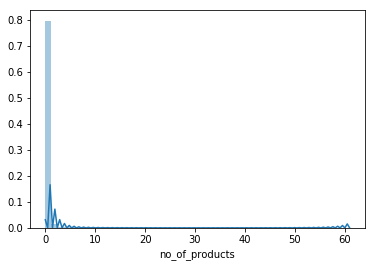

In [30]:
sns.distplot(df_final.no_of_products)

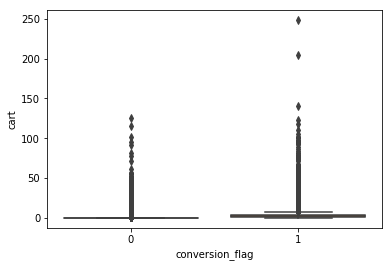

In [31]:
sns.boxplot(x="conversion_flag", y="cart", data=df_final)

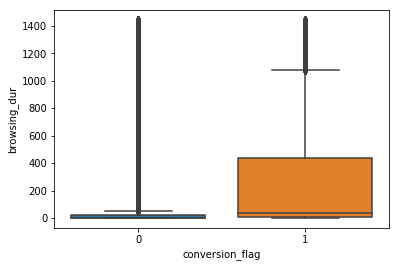

In [32]:
sns.boxplot(x="conversion_flag", y="browsing_dur", data=df_final)

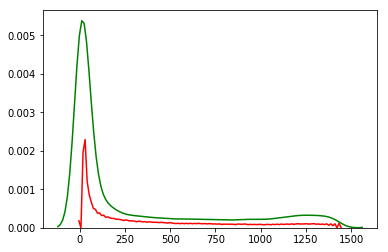

In [33]:
# Sort the dataframe by target
target_0 = df_final.loc[df_final['conversion_flag'] == 0]
target_1 = df_final.loc[df_final['conversion_flag'] == 1]

sns.distplot(target_0[['browsing_dur']], hist=False, color='red')
sns.distplot(target_1[['browsing_dur']], hist=False, color='green')

In [34]:
df_final[df_final.cart>=200].head()

,user_id,cart,category,content,default,error,home,iroa,lorigreiner,mys,...,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist,browsing_dur,cart_amt,no_of_products,timestamp,conversion_flag
209327,3737936252792774347,204.0,0.0,2.0,1.0,0.0,2.0,12.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,246.519283,89.36,2.0,0.00085,1
486247,8682062093007218632,248.0,0.0,5.0,6.0,0.0,0.0,14.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,1439.503917,90.07,3.0,1403.10690,1


### Import Machine learning algorithms & other imp packages

In [92]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier

### Train test data split

In [36]:
X = df_final.iloc[:,0:-1]
y = df_final.conversion_flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train: {X_train.shape} \n y_train: {y_train.shape} \nX_test: {X_test.shape} \n y_test: {y_test.shape}')

X_train: (413544, 22) 
 y_train: (413544,) 
X_test: (103387, 22) 
 y_test: (103387,)


### Logistic regression algorithm

In [37]:
clf_1 = LogisticRegression()
clf_1.fit(X_train.iloc[:,1:-3], y_train)
print(f'Train data: \n{classification_report(y_train, clf_1.predict(X_train.iloc[:,1:-3]))}\n\
        Test data: \n{classification_report(y_test, clf_1.predict(X_test.iloc[:,1:-3]))}')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train data: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    380672
           1       0.58      0.16      0.25     32872

    accuracy                           0.92    413544
   macro avg       0.76      0.57      0.61    413544
weighted avg       0.90      0.92      0.90    413544

        Test data: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     95406
           1       0.57      0.16      0.24      7981

    accuracy                           0.93    103387
   macro avg       0.75      0.57      0.60    103387
weighted avg       0.91      0.93      0.91    103387



In [38]:
X_train.iloc[:,1:-3].head()

,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete,wishlist,browsing_dur
182793,0.0,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.337867
162065,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.226383
507784,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
446105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
207470,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,19.156133


In [39]:
clf_2 = RandomForestClassifier()
clf_2.fit(X_train.iloc[:,1:-3], y_train)
print(f'Train data: \n{classification_report(y_train, clf_2.predict(X_train.iloc[:,1:-3]))}\n\
        Test data: \n{classification_report(y_test, clf_2.predict(X_test.iloc[:,1:-3]))}')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train data: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    380672
           1       0.99      0.91      0.95     32872

    accuracy                           0.99    413544
   macro avg       0.99      0.96      0.97    413544
weighted avg       0.99      0.99      0.99    413544

        Test data: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     95406
           1       0.51      0.38      0.44      7981

    accuracy                           0.92    103387
   macro avg       0.73      0.68      0.70    103387
weighted avg       0.92      0.92      0.92    103387



In [40]:
feature_importances = pd.DataFrame(clf_2.feature_importances_,
                                   index = X_train.iloc[:,1:-3].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
browsing_dur,3.193696e-01
cart,3.055988e-01
product,1.001092e-01
default,5.746542e-02
home,4.843346e-02
product-listing-category,4.430743e-02
content,4.375033e-02
iroa,3.578972e-02
product-listing-search,3.041180e-02
shoplive,8.497525e-03


In [41]:
#pd.concat(X_train.user_id,
#y_test.value_counts(normalize=True)
print(confusion_matrix(y_train, clf_2.predict(X_train.iloc[:,1:-3])))
print(pd.DataFrame(clf_2.predict_proba(X_train.iloc[:,1:-3]))[1].value_counts())

[[380376    296]
 [  2852  30020]]
0.000000    237786
0.003053     49595
0.001322     26533
0.100000     19865
0.003937     12242
0.000116      9469
0.200000      9354
0.900000      7973
0.800000      7737
0.700000      5680
0.000374      5632
1.000000      5271
0.300000      5198
0.600000      3613
0.400000      2894
0.500000      2457
0.001381       792
0.001231       654
0.067128       573
0.066667        10
0.050000         7
0.033333         6
0.366667         6
0.216667         5
0.283333         4
0.533333         4
0.433333         4
0.315000         4
0.525000         4
0.266667         4
             ...  
0.075000         1
0.211096         1
0.020000         1
0.233333         1
0.000252         1
0.880000         1
0.090000         1
0.223333         1
0.125000         1
0.065000         1
0.000071         1
0.116667         1
0.000387         1
0.933333         1
0.007488         1
0.160000         1
0.225000         1
0.000271         1
0.000127         1
0.258333       

In [66]:
clf_3 = GradientBoostingClassifier()
clf_3.fit(X_train.iloc[:,1:-3], y_train)
print(f'Train data: \n{classification_report(y_train, clf_3.predict(X_train.iloc[:,1:-3]))}\n\
        Test data: \n{classification_report(y_test, clf_3.predict(X_test.iloc[:,1:-3]))}')

Train data: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    380672
           1       0.60      0.46      0.52     32872

    accuracy                           0.93    413544
   macro avg       0.78      0.72      0.74    413544
weighted avg       0.93      0.93      0.93    413544

        Test data: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     95406
           1       0.59      0.46      0.52      7981

    accuracy                           0.93    103387
   macro avg       0.77      0.72      0.74    103387
weighted avg       0.93      0.93      0.93    103387



In [67]:
feature_importances = pd.DataFrame(clf_3.feature_importances_,
                                   index = X_train.iloc[:,1:-3].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
cart,0.872170
default,0.050800
product,0.031024
home,0.025251
product-listing-category,0.011818
iroa,0.004684
browsing_dur,0.002031
content,0.001181
product-listing-search,0.000943
product-listing-custom,0.000050


In [74]:
clf_4 = AdaBoostClassifier()
clf_4.fit(X_train.iloc[:,1:-3], y_train)
print(f'Train data: \n{classification_report(y_train, clf_4.predict(X_train.iloc[:,1:-3]))}\n\
        Test data: \n{classification_report(y_test, clf_4.predict(X_test.iloc[:,1:-3]))}')

Train data: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    380672
           1       0.59      0.45      0.51     32872

    accuracy                           0.93    413544
   macro avg       0.77      0.71      0.74    413544
weighted avg       0.92      0.93      0.93    413544

        Test data: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     95406
           1       0.58      0.45      0.51      7981

    accuracy                           0.93    103387
   macro avg       0.77      0.71      0.73    103387
weighted avg       0.93      0.93      0.93    103387



### Grid search and cross validation for hyper paramter tuning

In [171]:
model_params = {
    "logistic":{
        "model":LogisticRegression(solver="liblinear", multi_class="auto"),
        "params":{
            "C":[1,5,10]
        }
    },
    #"svm":{
    #    "model":svm.SVC(gamma='auto'),
    #    "params":{
    #        'C': [*range(1,10)],  ############## We can also use the range to get the paramters ####### 
    #        'kernel': ['rbf','linear']
    #    }
    #},
    "random_forest":{
        "model":RandomForestClassifier(),
        "params":{
            "n_estimators":[10,50,100]
        }
    },
    "gaussianNB":{
        "model":GaussianNB(),
        "params":{
        }
    },
    "MutilnominalNB":{
        "model":MultinomialNB(),
        "params":{
        }
    },
    "Decision_tree":{
        "model":DecisionTreeClassifier(),
        "params":{
            "criterion":['gini','entropy']
        }
    },
    "Gradient Boosting":{
        "model":GradientBoostingClassifier(),
        "params":{
            "n_estimators":[10,50,100],
            'learning_rate': [0.1,0.5,0.7],
            'criterion':['friedman_mse']
        }
    }
}

# For loop to use all distinct random values of parameters and come up with best f1-score model
scores=[]
for model_nm, mp in model_params.items():
    #print(model_nm, mp)
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False,\
                       scoring=make_scorer(f1_score, pos_label=True))
    clf.fit(X_train.iloc[:,1:-3], y_train)
    test_f1_score=f1_score(y_test,clf.predict(X_test.iloc[:,1:-3]))
    scores.append({
        'model': model_nm,
        'best_score_train': clf.best_score_,
        'best_params':clf.best_params_,
        'test_f1_score':test_f1_score
    })

df = pd.DataFrame(scores, columns = ['model','best_params','best_score_train','test_f1_score'])
df.head()

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetri

,model,best_params,best_score_train,test_f1_score
0,logistic,{'C': 1},0.250187,0.244444
1,random_forest,{'n_estimators': 100},0.483653,0.483436
2,gaussianNB,{},0.295474,0.290144
3,MutilnominalNB,{},0.442727,0.436919
4,Decision_tree,{'criterion': 'entropy'},0.430836,0.433702


In [172]:
df.head(100)

,model,best_params,best_score_train,test_f1_score
0,logistic,{'C': 1},0.250187,0.244444
1,random_forest,{'n_estimators': 100},0.483653,0.483436
2,gaussianNB,{},0.295474,0.290144
3,MutilnominalNB,{},0.442727,0.436919
4,Decision_tree,{'criterion': 'entropy'},0.430836,0.433702
5,Gradient Boosting,"{'criterion': 'friedman_mse', 'learning_rate':...",0.542115,0.528248


In [175]:
df.best_params[5]

{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'n_estimators': 10}

### Best model training based on grid search

In [177]:
clf_5 = GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.5,n_estimators= 10)
clf_5.fit(X_train.iloc[:,1:-3], y_train)
print(f'Train data: \n{classification_report(y_train, clf_5.predict(X_train.iloc[:,1:-3]))}\n\
        Test data: \n{classification_report(y_test, clf_5.predict(X_test.iloc[:,1:-3]))}')
feature_importances = pd.DataFrame(clf_5.feature_importances_,
                                   index = X_train.iloc[:,1:-3].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances.head(10))

Train data: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    380672
           1       0.59      0.50      0.54     32872

    accuracy                           0.93    413544
   macro avg       0.77      0.73      0.75    413544
weighted avg       0.93      0.93      0.93    413544

        Test data: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     95406
           1       0.57      0.49      0.53      7981

    accuracy                           0.93    103387
   macro avg       0.77      0.73      0.75    103387
weighted avg       0.93      0.93      0.93    103387

                          importance
cart                        0.839744
default                     0.082866
product                     0.036368
home                        0.026965
product-listing-category    0.007938
browsing_dur                0.003304
iroa                        0.001864
content          

### ROC curve for all above models

In [228]:
fpr_1, tpr_1, thr = roc_curve(y_test, clf_1.predict_proba(X_test.iloc[:,1:-3])[:,1])
fpr_2, tpr_2, thr = roc_curve(y_test, clf_2.predict_proba(X_test.iloc[:,1:-3])[:,1])
fpr_3, tpr_3, thr = roc_curve(y_test, clf_3.predict_proba(X_test.iloc[:,1:-3])[:,1])
fpr_4, tpr_4, thr = roc_curve(y_test, clf_4.predict_proba(X_test.iloc[:,1:-3])[:,1])
#Best one based on grid search
fpr_5, tpr_5, thr = roc_curve(y_test, clf_5.predict_proba(X_test.iloc[:,1:-3])[:,1])

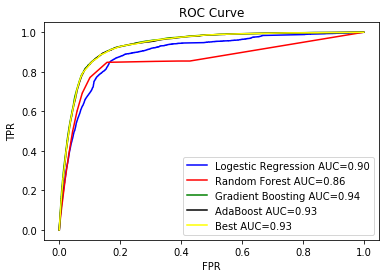

In [229]:
plt.plot(fpr_1, tpr_1,'b' ,label=f'Logestic Regression AUC=%.2f'%auc(fpr_1,tpr_1))
plt.plot(fpr_2, tpr_2,'r' ,label=f'Random Forest AUC=%.2f'%auc(fpr_2,tpr_2))
plt.plot(fpr_3, tpr_3,'g' ,label=f'Gradient Boosting AUC=%.2f'%auc(fpr_3,tpr_3))
plt.plot(fpr_4, tpr_4,'black' ,label=f'AdaBoost AUC=%.2f'%auc(fpr_4,tpr_4))
plt.plot(fpr_5, tpr_5,'yellow' ,label=f'Best AUC=%.2f'%auc(fpr_5,tpr_5))
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Adding probability scoring to users to get conversion based on browsing data

In [265]:
conv_score = pd.DataFrame(clf_5.predict_proba(X.iloc[:,1:-3])[:,0], columns=['score_to_purchase_product'])
df_output = pd.merge(pd.DataFrame(X.user_id, columns=['user_id']), conv_score,how='left', left_index=True, right_index=True)
df_output.head()

,user_id,score_to_purchase_product
1,2,0.988511
2,5,0.969782
3,342391,0.992672
4,420372,0.982896
5,915687,0.983593
